In [1]:
from google.colab import files
uploaded = files.upload()


Saving Supermarket Sales 2.csv to Supermarket Sales 2 (1).csv


In [2]:
import pandas as pd



In [3]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


In [4]:
print("🔹 First 10 rows of your dataset:")
display(df.head(10))

🔹 First 10 rows of your dataset:


,Date,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating
0,1/1/2024,Brooklyn,Member,Female,Food & Beverages,84.63,10,Credit card,9.0
1,1/1/2024,Queens,Normal,Female,Electronics,63.22,2,Cash,8.5
2,1/1/2024,Brooklyn,Normal,Female,Electronics,74.71,6,Cash,6.7
3,1/1/2024,Queens,Member,Female,Sports & Travel,36.98,10,Credit card,7.0
4,1/1/2024,Manhattan,Member,Female,Sports & Travel,27.04,4,Ewallet,6.9
5,1/1/2024,Manhattan,Normal,Female,Fashion & Accs,65.74,9,Cash,7.7
6,1/1/2024,Manhattan,Member,Male,Home & Lifestyle,47.59,8,Cash,5.7
7,1/1/2024,Manhattan,Normal,Male,Sports & Travel,72.61,6,Credit card,6.9
8,1/1/2024,Queens,Normal,Male,Health & Beauty,62.87,2,Cash,5.0
9,1/1/2024,Brooklyn,Normal,Male,Food & Beverages,21.12,8,Cash,6.3


In [5]:
print("\n🔹 Column names:")
print(df.columns.tolist())


🔹 Column names:
['Date', 'Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment', 'Rating']


In [6]:

print("\n🔹 Dataset shape (rows, columns):")
print(df.shape)


🔹 Dataset shape (rows, columns):
(5053, 9)


In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [8]:
X = df.drop(columns=['Rating'])
y = df['Rating']


In [9]:
categorical_cols = ['Date', 'Branch', 'Customer type', 'Gender', 'Product line', 'Payment']
numeric_cols = ['Unit price', 'Quantity']


In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)


In [11]:
X_transformed = preprocessor.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 1.7419683170602385
R² Score: -0.024814852929943898


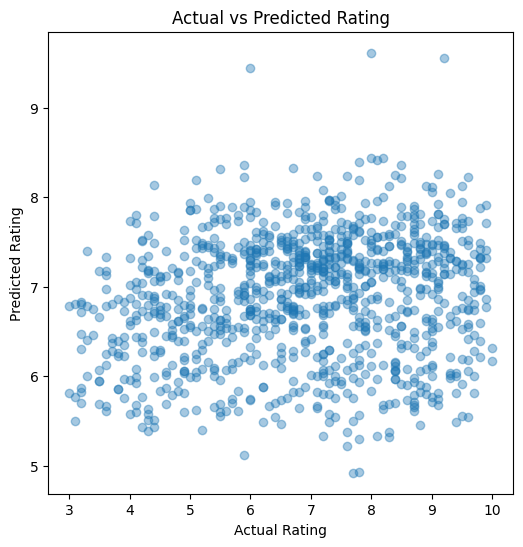

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.show()

